In [1]:
import numpy as np
import matplotlib.pyplot as plt
import staintools as staintools

import os
from os import listdir
from os.path import isfile, join

import datetime

In [2]:
# normalization of test data (training data already normalized)

In [3]:
# read data

testing_imgs_path = "./MoNuSegDataset_TechAIChallenge/MoNuSegTestData/Tissue Images"
img_names_to_transform = [file_name for file_name in listdir(testing_imgs_path) if isfile(join(testing_imgs_path, file_name))]

imgs_to_transform = [staintools.read_image(testing_imgs_path+"/"+img_name) for img_name in img_names_to_transform]

In [4]:
# Standardize brightness (optional, can improve the tissue mask calculation)

imgs_to_transform = list(map(staintools.LuminosityStandardizer.standardize, imgs_to_transform))

In [5]:
# Stain normalize

target = imgs_to_transform.pop()
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed_imgs = list(map(normalizer.transform,imgs_to_transform))

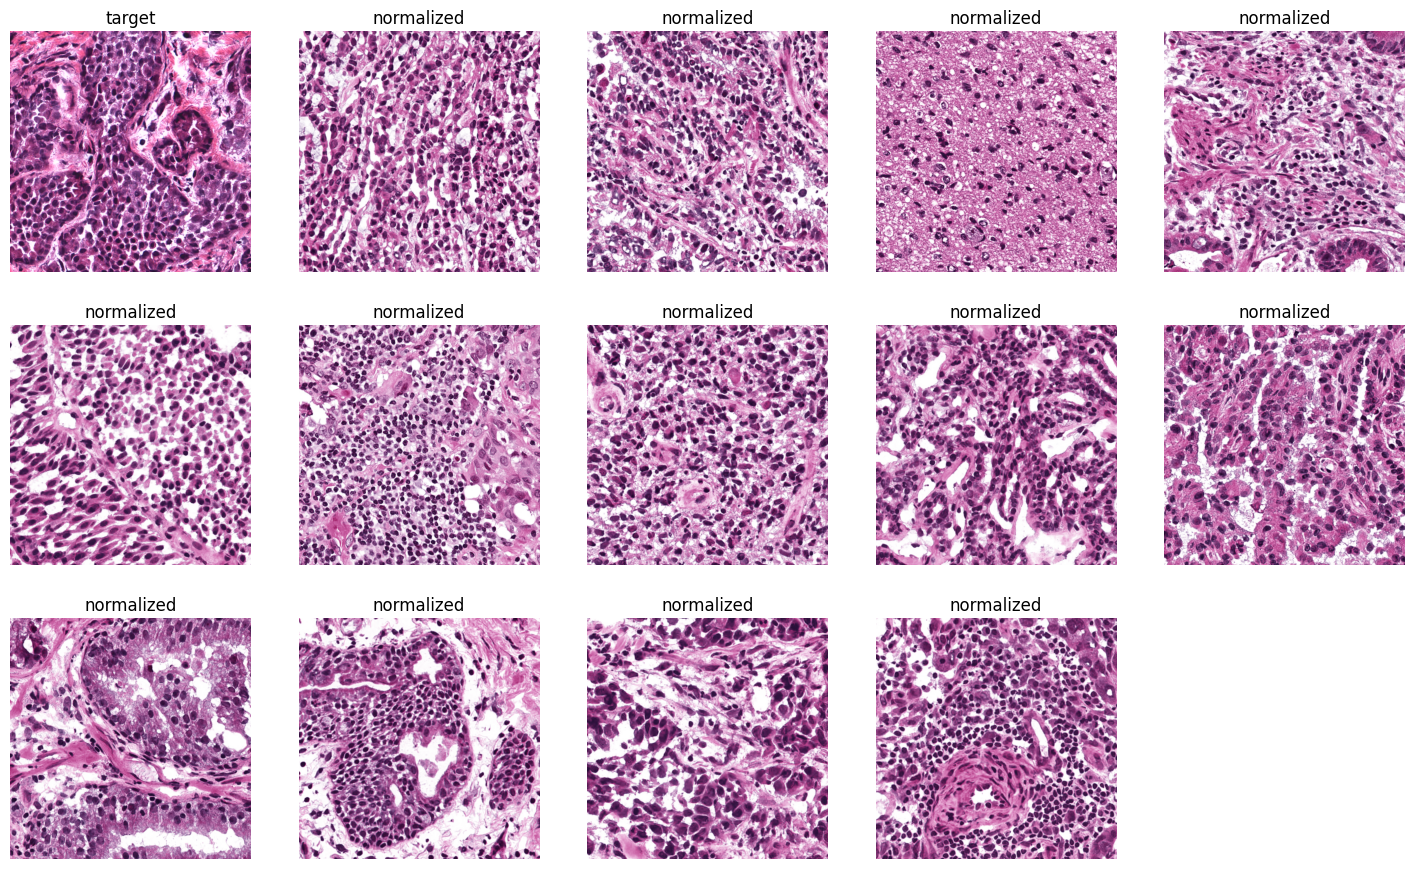

In [9]:
# Set up
    
images = [target] + transformed_imgs
title =  ["target"] + ['normalized']*15
staintools.plot_image_list(images,width=5,title_list=title)

In [12]:
from PIL import Image

RESULTS_DIR = './MoNuSegDataset_TechAIChallenge/MoNuSegTestData/Tissue Images Normalized/'
os.mkdir(RESULTS_DIR)
for i in range(len(images)):
    im = Image.fromarray(images[i])
    img_name = img_names_to_transform[i]
    im.save(RESULTS_DIR+img_name)  


FileExistsError: [Errno 17] File exists: './MoNuSegDataset_TechAIChallenge/MoNuSegTestData/Tissue Images Normalized/'